# US Accidents Exploratory Data Analysis (EDA)

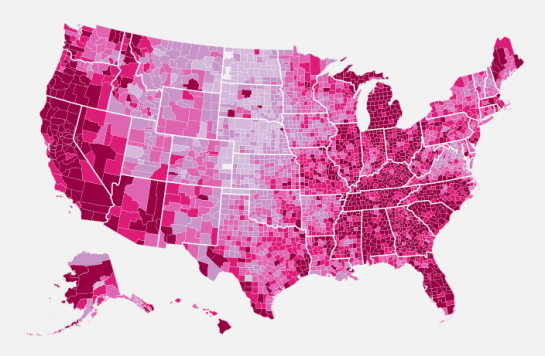


In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv


## 1. Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## 2. Data Preperation and cleaning

- Load the file using pandas
- Look at some information about the data and the columns
- Fix any missing or incorrect values

In [3]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


### Handling all the missing values

<AxesSubplot:>

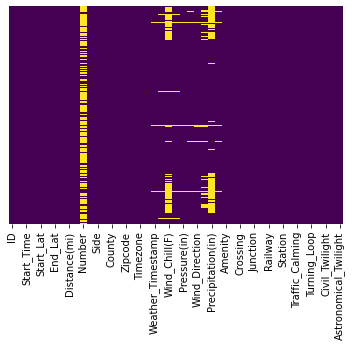

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# plotting a heatmap of missing values in columns

In [7]:
# Filling in the missing values in some of the columns related to weather

df["Wind_Chill(F)"] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df["Precipitation(in)"] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df["Wind_Speed(mph)"] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())

## 3. Exploratory Analysis and Visualization

Based On:

- State and City
- Time
- Severity and Weather Conditions
- Locations

### Which state has the maximum no: of accidents?

In [8]:
state_wise_counts = df.groupby('State')['ID'].count().reset_index()

In [9]:
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)

<AxesSubplot:xlabel='ID', ylabel='State'>

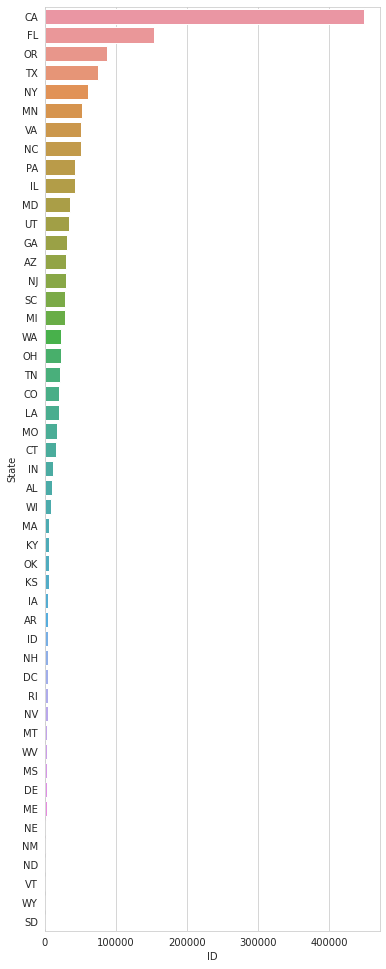

In [10]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(6, 17))
sns.barplot(y="State", x="ID", data=state_wise_counts)

### Choropleth state wise distribution of accidents

In [11]:
df_states_count = pd.value_counts(df['State'])


fig = px.choropleth(
    df,
    locations=df_states_count.index,
    color_continuous_scale='spectral_r',
    locationmode='USA-states',
    color=df_states_count.values.astype(float),
    title="US accidents by State",
    scope="usa"
)
fig.show()

### Top 10 cities by the number of accidents

In [12]:
cities = df.City.unique()
len(cities)

10658

In [13]:
city_wise_counts = df.City.value_counts()
city_wise_counts.head(10)

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

[Text(0.5, 1.0, 'Top 10 cities By Number of Accidents'),
 Text(0.5, 0, 'Cities'),
 Text(0, 0.5, 'Accidents Count')]

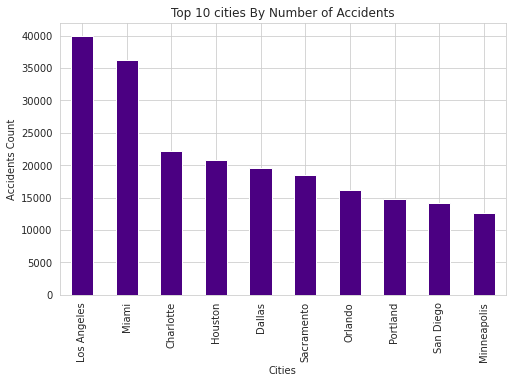

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
city_wise_counts[:10].plot(kind='bar',color='indigo')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')

### Accidents based on Time

In [15]:
df.Start_Time = pd.to_datetime(df.Start_Time)

Text(0.5, 1.0, 'Accidents Count By Time of Day')

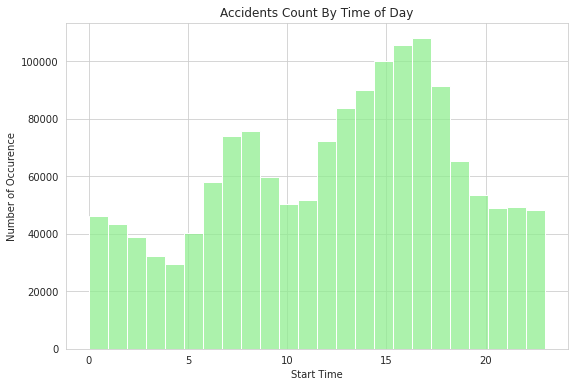

In [16]:
# To find the accidents by time of day

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(df.Start_Time.dt.hour,bins=24,kde=False,color='lightgreen')

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

Text(0.5, 1.0, 'Accidents Count By Day of Week')

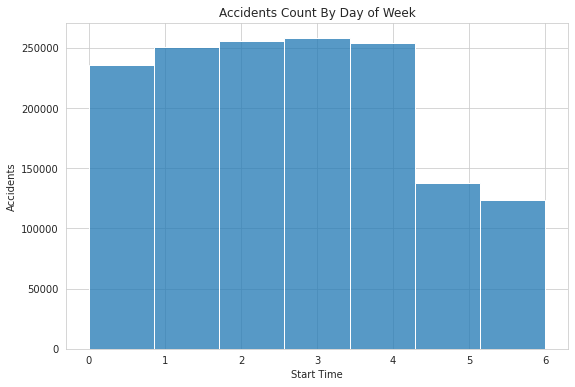

In [17]:
# To find the accidents by Day of the week

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(df.Start_Time.dt.dayofweek,bins=7,kde=False)

plt.xlabel("Start Time")
plt.ylabel("Accidents")
plt.title('Accidents Count By Day of Week')

Text(0.5, 1.0, 'Accidents by Month of the Year')

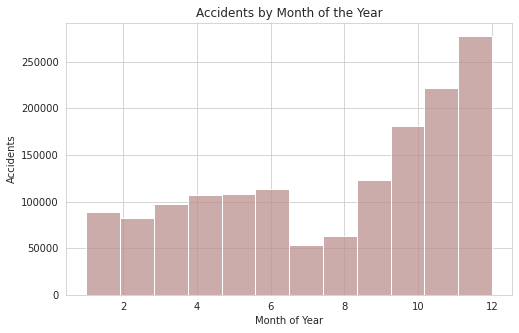

In [18]:
# To find the accidents by the month of the year

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.month, bins = 12,color='rosybrown')

plt.xlabel("Month of Year")
plt.ylabel("Accidents")
plt.title('Accidents by Month of the Year')

Text(0.5, 1.0, 'Accidents in 2016')

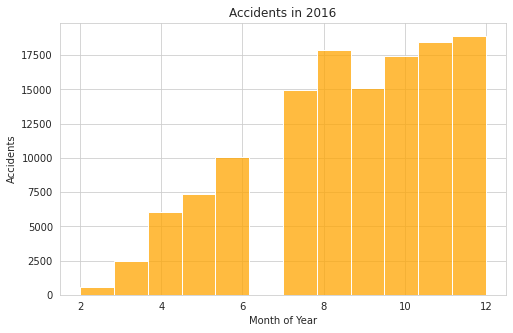

In [19]:
# Accidents for the year 2016 by months

accident_2016 = df[df.Start_Time.dt.year == 2016]

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(accident_2016.Start_Time.dt.month, bins = 12,color='orange')

plt.xlabel("Month of Year")
plt.ylabel("Accidents")
plt.title('Accidents in 2016')

### Accidents based on Severity and Weather Conditions

In [20]:
df_severity = df.groupby('Severity')['ID'].count()
df_severity

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

Text(0.5, 1.0, 'Degree of Severity')

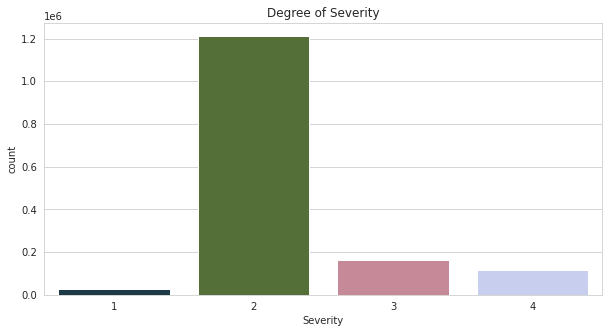

In [21]:
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="Severity", data=df, palette = "cubehelix")
sev.set_title("Degree of Severity")

In [22]:
weather = df.iloc[:, 20:30]
weather['Severity'] = df['Severity']
weather.head()

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Severity
0,2016-02-08 00:53:00,42.1,36.10000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,3
1,2016-02-08 05:58:00,36.9,55.10976,91.0,29.68,10.0,Calm,7.630812,0.020000,Light Rain,2
2,2016-02-08 05:53:00,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,2
3,2016-02-08 05:53:00,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,2
4,2016-02-08 06:54:00,39.0,55.10976,55.0,29.65,10.0,Calm,7.630812,0.008478,Overcast,2


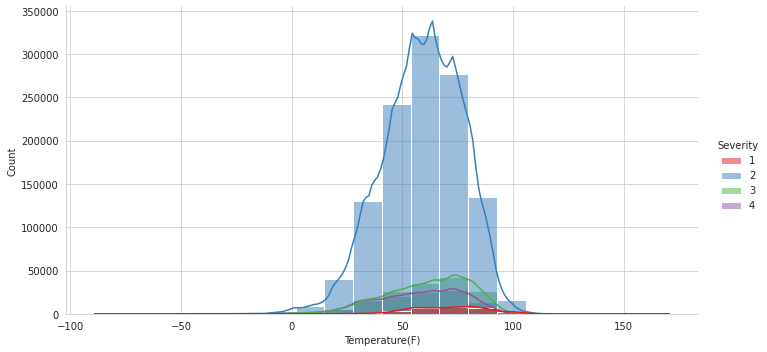

In [23]:
sns.displot(weather, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

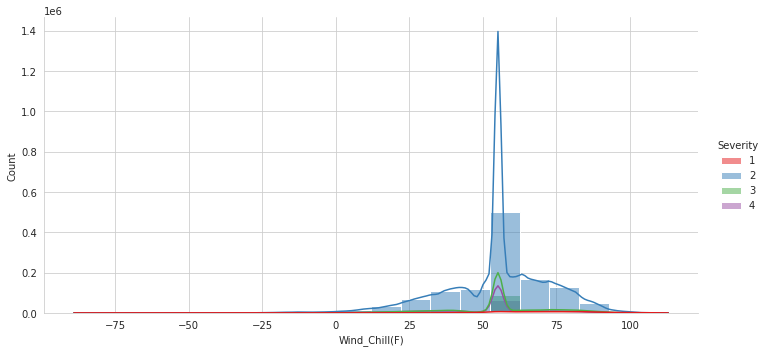

In [24]:
sns.displot(weather, x="Wind_Chill(F)", hue="Severity",palette="Set1", height=5, aspect=2,bins=20,kde=True);

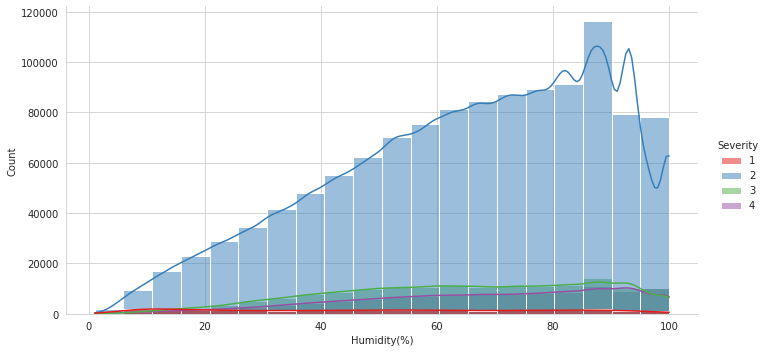

In [25]:
sns.displot(weather, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

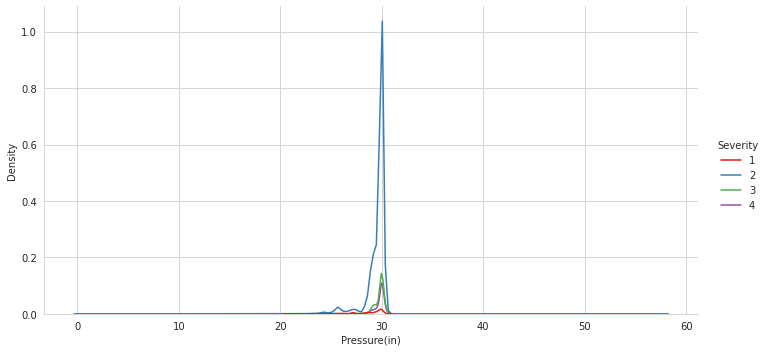

In [26]:
sns.displot(weather, x="Pressure(in)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

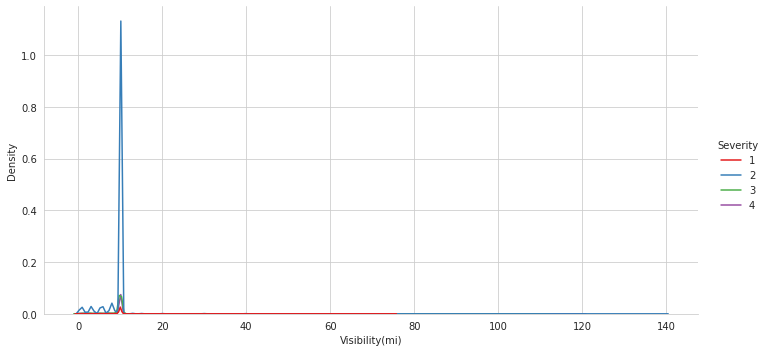

In [27]:
sns.displot(weather, x="Visibility(mi)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

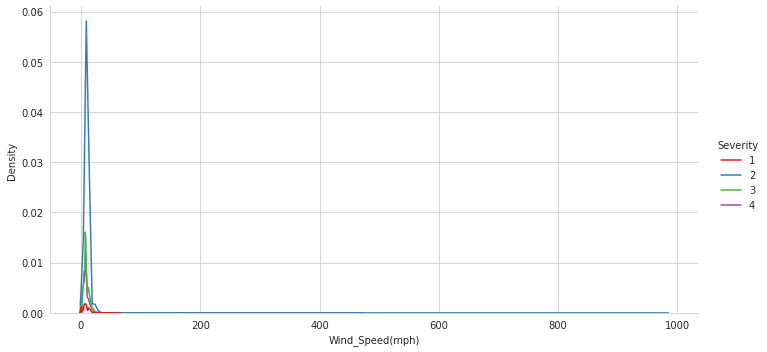

In [28]:
sns.displot(weather, x="Wind_Speed(mph)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

### Accidents based on Location

In [29]:
location = df.iloc[:, 29:43]
location.head()

,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Traffic_Signal')

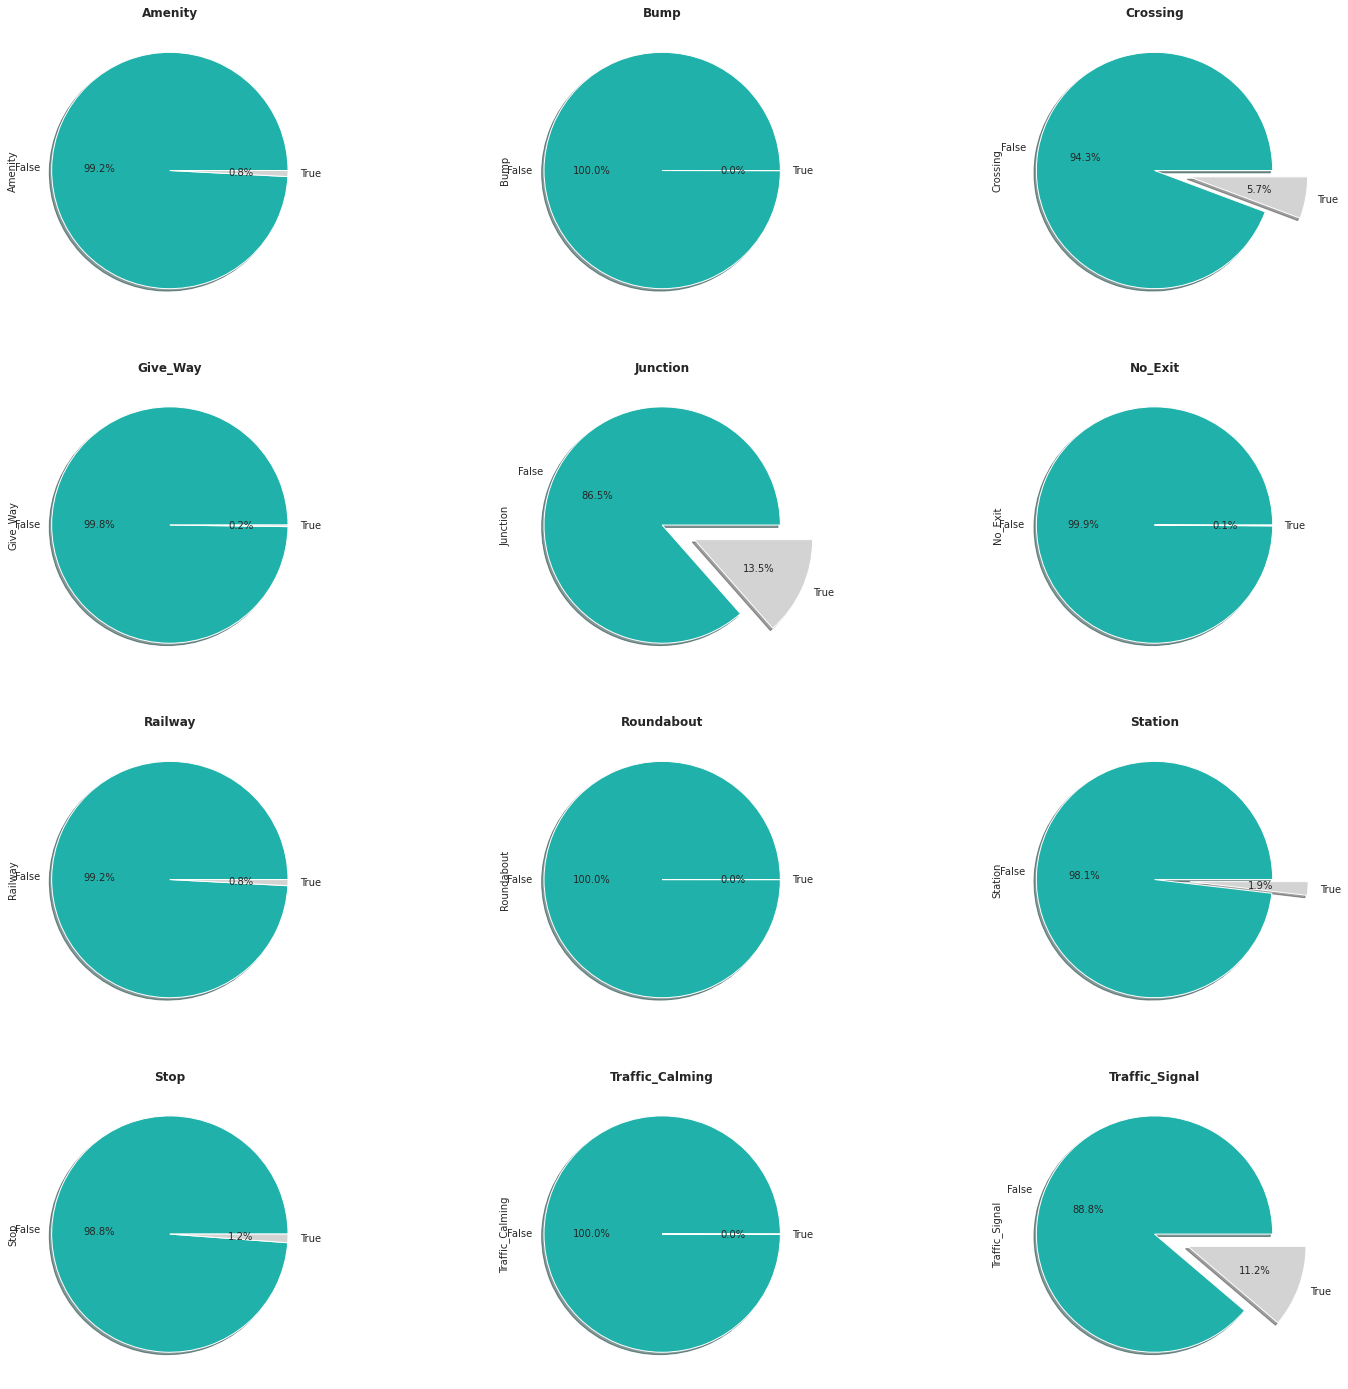

In [30]:
f,ax=plt.subplots(4,3,figsize=(25,25))
explode = [0,0.3]

ax[0,0] = location['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = location['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = location['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = location['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = location['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = location['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["lightseagreen","lightgray"],shadow = True)
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = location['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = location['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = location['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = location['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = location['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = location['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")


# Insights

- California State has the most number of accidents.
- Los Angeles has the highest accidents amongst any city
- Most of the accidents happen between 6am and 10am also between 12pm and 7pm 
- Accidents are more on weekdays than the weekends
- Winter months seems to have more accidents than the summer months but there seems to be some ambiguity. The reason is that the data for the no: of   accidents in the year 2016 might have been missing
- Degree 2 severity of accidents is more common than the other three
- Accidents are common at a junction, crossing or a traffic signal
